In [1]:
# Load packages which are frequently used through experiments
import numpy as np
import matplotlib.pyplot as plt
import random, math

In [2]:
# Create an experiment interface
import experiment_interface
interface = experiment_interface.ExperimentInterface()

In [3]:
# Generate/Train sufficient white-box neural networks as database

# num_of_model_generated = 5000
# interface.generate_whitebox_model(num_of_model_generated)

In [4]:
# Extract trained white-box neural networks as database for Weight Reverse Model 
num_of_model_extracted = 30

weights_dataset = interface.extract_whitebox_model_weights(num_of_model_extracted)
print(weights_dataset.shape)

outputs_dataset = interface.extract_whitebox_model_outputs(num_of_model_extracted)
print(outputs_dataset.shape)

predictions_dataset = interface.extract_whitebox_model_predictions(num_of_model_extracted)
print(predictions_dataset.shape)

(30, 50890)
(30, 100000)
(30, 10000)


In [5]:
# Set the database and hyperparameters for training Weight Reverse Model 
batch_size = 5
num_of_epochs = 20
num_of_print_interval = 6

interface.set_weightmodel_train_dataset(weights_dataset, outputs_dataset, predictions_dataset, batch_size)
interface.set_weightmodel_hyperparameters(num_of_epochs=num_of_epochs, num_of_print_interval=num_of_print_interval)

In [6]:
# experiment 1: draw l1, l2, and combined loss
(combined_losses, l1_losses, l2_losses) = interface.train_weightmodel_experiment_1()

Epoch [1/20], Step [6/6.0], Loss: 1321.2524
Epoch [2/20], Step [6/6.0], Loss: 2.4816
Epoch [3/20], Step [6/6.0], Loss: 2.4776
Epoch [4/20], Step [6/6.0], Loss: 2.4729
Epoch [5/20], Step [6/6.0], Loss: 2.4671
Epoch [6/20], Step [6/6.0], Loss: 2.4595
Epoch [7/20], Step [6/6.0], Loss: 2.4500
Epoch [8/20], Step [6/6.0], Loss: 2.4382
Epoch [9/20], Step [6/6.0], Loss: 2.4237
Epoch [10/20], Step [6/6.0], Loss: 2.4064
Epoch [11/20], Step [6/6.0], Loss: 2.3857
Epoch [12/20], Step [6/6.0], Loss: 2.3627
Epoch [13/20], Step [6/6.0], Loss: 2.3397
Epoch [14/20], Step [6/6.0], Loss: 2.3189
Epoch [15/20], Step [6/6.0], Loss: 2.3014
Epoch [16/20], Step [6/6.0], Loss: 2.2880
Epoch [17/20], Step [6/6.0], Loss: 2.2791
Epoch [18/20], Step [6/6.0], Loss: 2.2747
Epoch [19/20], Step [6/6.0], Loss: 2.2740
Epoch [20/20], Step [6/6.0], Loss: 2.2759
Data of experiment 1 is successfully computed and returned


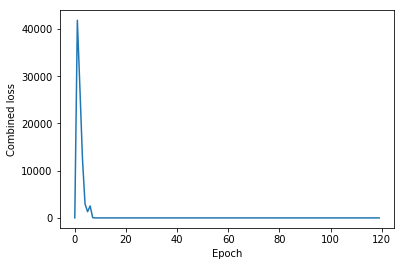

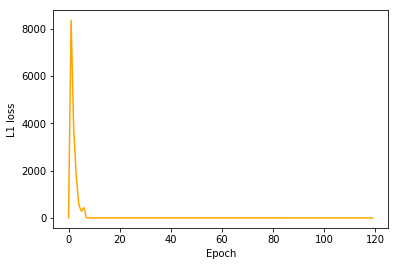

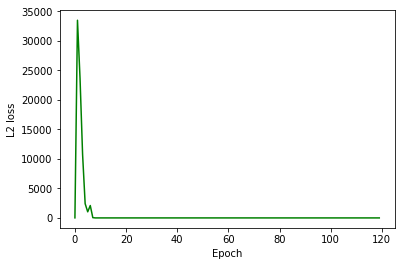

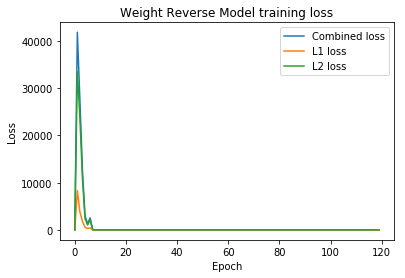

In [7]:
# experiment 1: draw l1, l2, and combined loss (continued)
epoch_indexs = np.arange(len(combined_losses))

plt.plot(epoch_indexs, combined_losses)
plt.xlabel('Epoch')
plt.ylabel('Combined loss')
plt.show()

plt.plot(epoch_indexs, l1_losses, "-", color='orange')
plt.xlabel('Epoch')
plt.ylabel('L1 loss')
plt.show()

plt.plot(epoch_indexs, l2_losses, "g-")
plt.xlabel('Epoch')
plt.ylabel('L2 loss')
plt.show()

plt.plot(epoch_indexs, combined_losses)
plt.plot(epoch_indexs, l1_losses)
plt.plot(epoch_indexs, l2_losses)
plt.legend(['Combined loss', 'L1 loss', 'L2 loss'], loc='upper right')
plt.title('Weight Reverse Model training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [8]:
# experiment 2: randomly select some weights, to see how predicted weights and approach the ground-truth weights
interface.init_weight_reverse_model_interface()

num_of_epochs = 50
interface.set_weightmodel_hyperparameters(num_of_epochs=num_of_epochs, num_of_print_interval=num_of_print_interval)

collected_data_for_experiment_2 = interface.train_weightmodel_experiment_2()

Epoch [1/50], Step [6/6.0], Loss: 1355.5311
Epoch [2/50], Step [6/6.0], Loss: 2.4881
Epoch [3/50], Step [6/6.0], Loss: 2.4872
Epoch [4/50], Step [6/6.0], Loss: 2.4862
Epoch [5/50], Step [6/6.0], Loss: 2.4850
Epoch [6/50], Step [6/6.0], Loss: 2.4835
Epoch [7/50], Step [6/6.0], Loss: 2.4816
Epoch [8/50], Step [6/6.0], Loss: 2.4794
Epoch [9/50], Step [6/6.0], Loss: 2.4768
Epoch [10/50], Step [6/6.0], Loss: 2.4739
Epoch [11/50], Step [6/6.0], Loss: 2.4705
Epoch [12/50], Step [6/6.0], Loss: 2.4668
Epoch [13/50], Step [6/6.0], Loss: 2.4627
Epoch [14/50], Step [6/6.0], Loss: 2.4583
Epoch [15/50], Step [6/6.0], Loss: 2.4534
Epoch [16/50], Step [6/6.0], Loss: 2.4479
Epoch [17/50], Step [6/6.0], Loss: 2.4418
Epoch [18/50], Step [6/6.0], Loss: 2.4351
Epoch [19/50], Step [6/6.0], Loss: 2.4278
Epoch [20/50], Step [6/6.0], Loss: 2.4200
Epoch [21/50], Step [6/6.0], Loss: 2.4118
Epoch [22/50], Step [6/6.0], Loss: 2.4036
Epoch [23/50], Step [6/6.0], Loss: 2.3956
Epoch [24/50], Step [6/6.0], Loss: 2.387

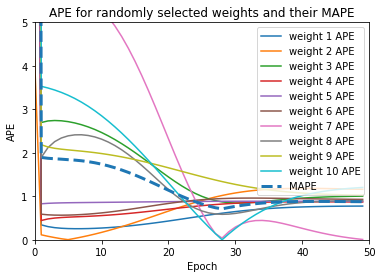

In [9]:
# experiment 2: randomly select some weights, to see how predicted weights and approach the ground-truth weights (continued)
epoch_indexs = np.arange(len(collected_data_for_experiment_2[0]))
line_names = []
for i in range(len(collected_data_for_experiment_2)):
    if i == len(collected_data_for_experiment_2)-1:
        name = 'MAPE'
        avg_percentage_err = collected_data_for_experiment_2[i]
        plt.plot(epoch_indexs, avg_percentage_err, "--",linewidth=3)
    else:
        name = 'weight '+str(i+1)+' APE'
        abs_percentage_err_i = collected_data_for_experiment_2[i]
        plt.plot(epoch_indexs, abs_percentage_err_i)

    line_names.append(name)
    
plt.axis([0, len(epoch_indexs), 0, 5])
plt.title('APE for randomly selected weights and their MAPE')
plt.xlabel('Epoch')
plt.ylabel('APE')
plt.legend(line_names, loc='upper right')
plt.show()

In [10]:
# experiment 2: randomly select some weights, to see how predicted weights and approach the ground-truth weights (continued)
interface.init_weight_reverse_model_interface()

num_of_epochs = 100
interface.set_weightmodel_hyperparameters(num_of_epochs=num_of_epochs, num_of_print_interval=num_of_print_interval)

collected_data_for_experiment_2 = interface.train_weightmodel_experiment_2()

Epoch [1/100], Step [6/6.0], Loss: 678.5627
Epoch [2/100], Step [6/6.0], Loss: 2.4805
Epoch [3/100], Step [6/6.0], Loss: 2.4788
Epoch [4/100], Step [6/6.0], Loss: 2.4757
Epoch [5/100], Step [6/6.0], Loss: 2.4714
Epoch [6/100], Step [6/6.0], Loss: 2.4661
Epoch [7/100], Step [6/6.0], Loss: 2.4596
Epoch [8/100], Step [6/6.0], Loss: 2.4520
Epoch [9/100], Step [6/6.0], Loss: 2.4432
Epoch [10/100], Step [6/6.0], Loss: 2.4329
Epoch [11/100], Step [6/6.0], Loss: 2.4214
Epoch [12/100], Step [6/6.0], Loss: 2.4084
Epoch [13/100], Step [6/6.0], Loss: 2.3944
Epoch [14/100], Step [6/6.0], Loss: 2.3800
Epoch [15/100], Step [6/6.0], Loss: 2.3659
Epoch [16/100], Step [6/6.0], Loss: 2.3530
Epoch [17/100], Step [6/6.0], Loss: 2.3415
Epoch [18/100], Step [6/6.0], Loss: 2.3318
Epoch [19/100], Step [6/6.0], Loss: 2.3239
Epoch [20/100], Step [6/6.0], Loss: 2.3180
Epoch [21/100], Step [6/6.0], Loss: 2.3138
Epoch [22/100], Step [6/6.0], Loss: 2.3111
Epoch [23/100], Step [6/6.0], Loss: 2.3095
Epoch [24/100], St

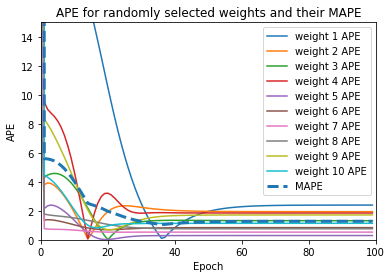

In [21]:
# experiment 2: randomly select some weights, to see how predicted weights and approach the ground-truth weights (continued)
epoch_indexs = np.arange(len(collected_data_for_experiment_2[0]))
line_names = []
for i in range(len(collected_data_for_experiment_2)):
    if i == len(collected_data_for_experiment_2)-1:
        name = 'MAPE'
        avg_percentage_err = collected_data_for_experiment_2[i]
        plt.plot(epoch_indexs, avg_percentage_err, "--",linewidth=3)
    else:
        name = 'weight '+str(i+1)+' APE'
        abs_percentage_err_i = collected_data_for_experiment_2[i]
        plt.plot(epoch_indexs, abs_percentage_err_i)

    line_names.append(name)
    
plt.axis([0, len(epoch_indexs), 0, 15])
plt.title('APE for randomly selected weights and their MAPE')
plt.xlabel('Epoch')
plt.ylabel('APE')
plt.legend(line_names, loc='upper right')
plt.show()

In [12]:
def experiment_3():
    pass
    # iteratively set loss to be either l1, l2, or combined loss
        # conduct experiment 2
        # examinate the result of experimment 2

In [13]:
# experiment 3: based on the experiment 2, how randomly selected converage by different loss functions? Either l1, l2, and combined loss(l1 + l2)


# Record down all observations & Ponder is the loss back-propogation reasonable or not
# Observation 1: Even l1 and l2 are smoonthly converaged, model constructed 
#                by predicted weights only has classification accurancy 
#                around 10%, which does not better than random guess. 